In [2]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator # Remove this line
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings # Correct the typo from 'waarnings' to 'warnings'
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img

from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
#from keras.preprocessing.image import ImageDataGenerator, load_img  # Remove this line
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Import ImageDataGenerator from the correct location
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tf.keras

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip


In [5]:
!unzip train.zip -d train_data

Streaming output truncated to the last 5000 lines.
  inflating: train_data/train/sad/30743.jpg  
  inflating: train_data/train/sad/30750.jpg  
  inflating: train_data/train/sad/30752.jpg  
  inflating: train_data/train/sad/30757.jpg  
  inflating: train_data/train/sad/30764.jpg  
  inflating: train_data/train/sad/30767.jpg  
  inflating: train_data/train/sad/30776.jpg  
  inflating: train_data/train/sad/3078.jpg  
  inflating: train_data/train/sad/30784.jpg  
  inflating: train_data/train/sad/30785.jpg  
  inflating: train_data/train/sad/30791.jpg  
  inflating: train_data/train/sad/30800.jpg  
  inflating: train_data/train/sad/30810.jpg  
  inflating: train_data/train/sad/30816.jpg  
  inflating: train_data/train/sad/3082.jpg  
  inflating: train_data/train/sad/30833.jpg  
  inflating: train_data/train/sad/30838.jpg  
  inflating: train_data/train/sad/30839.jpg  
  inflating: train_data/train/sad/30846.jpg  
  inflating: train_data/train/sad/30863.jpg  
  inflating: train_data/train/s

In [6]:
!unzip test.zip -d test_data

Streaming output truncated to the last 5000 lines.
  inflating: test_data/test/test/happy/PrivateTest_22108748.jpg  
  inflating: test_data/test/test/happy/PrivateTest_22154496.jpg  
  inflating: test_data/test/test/happy/PrivateTest_2260082.jpg  
  inflating: test_data/test/test/happy/PrivateTest_22689070.jpg  
  inflating: test_data/test/test/happy/PrivateTest_22929697.jpg  
  inflating: test_data/test/test/happy/PrivateTest_22938435.jpg  
  inflating: test_data/test/test/happy/PrivateTest_22979298.jpg  
  inflating: test_data/test/test/happy/PrivateTest_2309763.jpg  
  inflating: test_data/test/test/happy/PrivateTest_23250597.jpg  
  inflating: test_data/test/test/happy/PrivateTest_23282756.jpg  
  inflating: test_data/test/test/happy/PrivateTest_23344981.jpg  
  inflating: test_data/test/test/happy/PrivateTest_23400117.jpg  
  inflating: test_data/test/test/happy/PrivateTest_2352334.jpg  
  inflating: test_data/test/test/happy/PrivateTest_23574753.jpg  
  inflating: test_data/test/

In [7]:
import os
os.listdir("train_data")

['train']

In [8]:
Train_path = "train_data/train/"
Test_path = "test_data/test/"

In [9]:
def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
        print(label, "Completed")
    return image_paths, labels

In [10]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(Train_path)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

neutral Completed
angry Completed
surprise Completed
happy Completed
disgust Completed
sad Completed
fear Completed


,image,label
0,train_data/train/happy/22790.jpg,happy
1,train_data/train/sad/7168.jpg,sad
2,train_data/train/fear/11468.jpg,fear
3,train_data/train/neutral/8770.jpg,neutral
4,train_data/train/sad/5899.jpg,sad


In [11]:
## convert into dataframe
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(Test_path)
test.head()

neutral Completed
angry Completed
test Completed
surprise Completed
happy Completed
disgust Completed
sad Completed
fear Completed


,image,label
0,test_data/test/neutral/PublicTest_46300400.jpg,neutral
1,test_data/test/neutral/PrivateTest_32421186.jpg,neutral
2,test_data/test/neutral/PrivateTest_45065652.jpg,neutral
3,test_data/test/neutral/PrivateTest_30804097.jpg,neutral
4,test_data/test/neutral/PrivateTest_57886223.jpg,neutral


<Axes: xlabel='count', ylabel='label'>

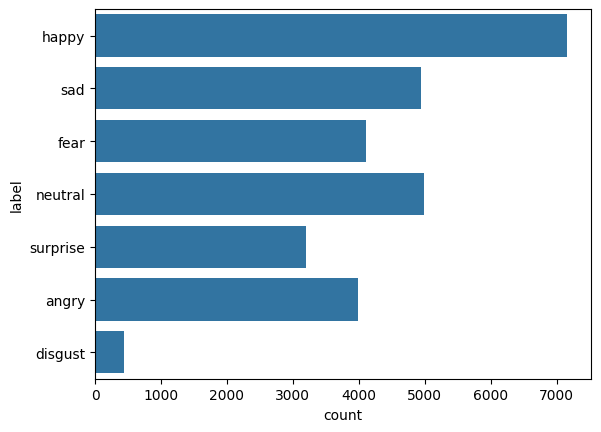

In [12]:
sns.countplot(train['label'])

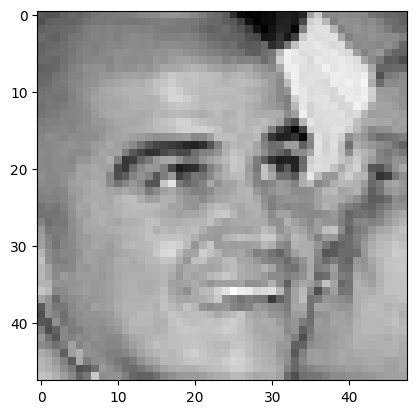

In [16]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray'); #

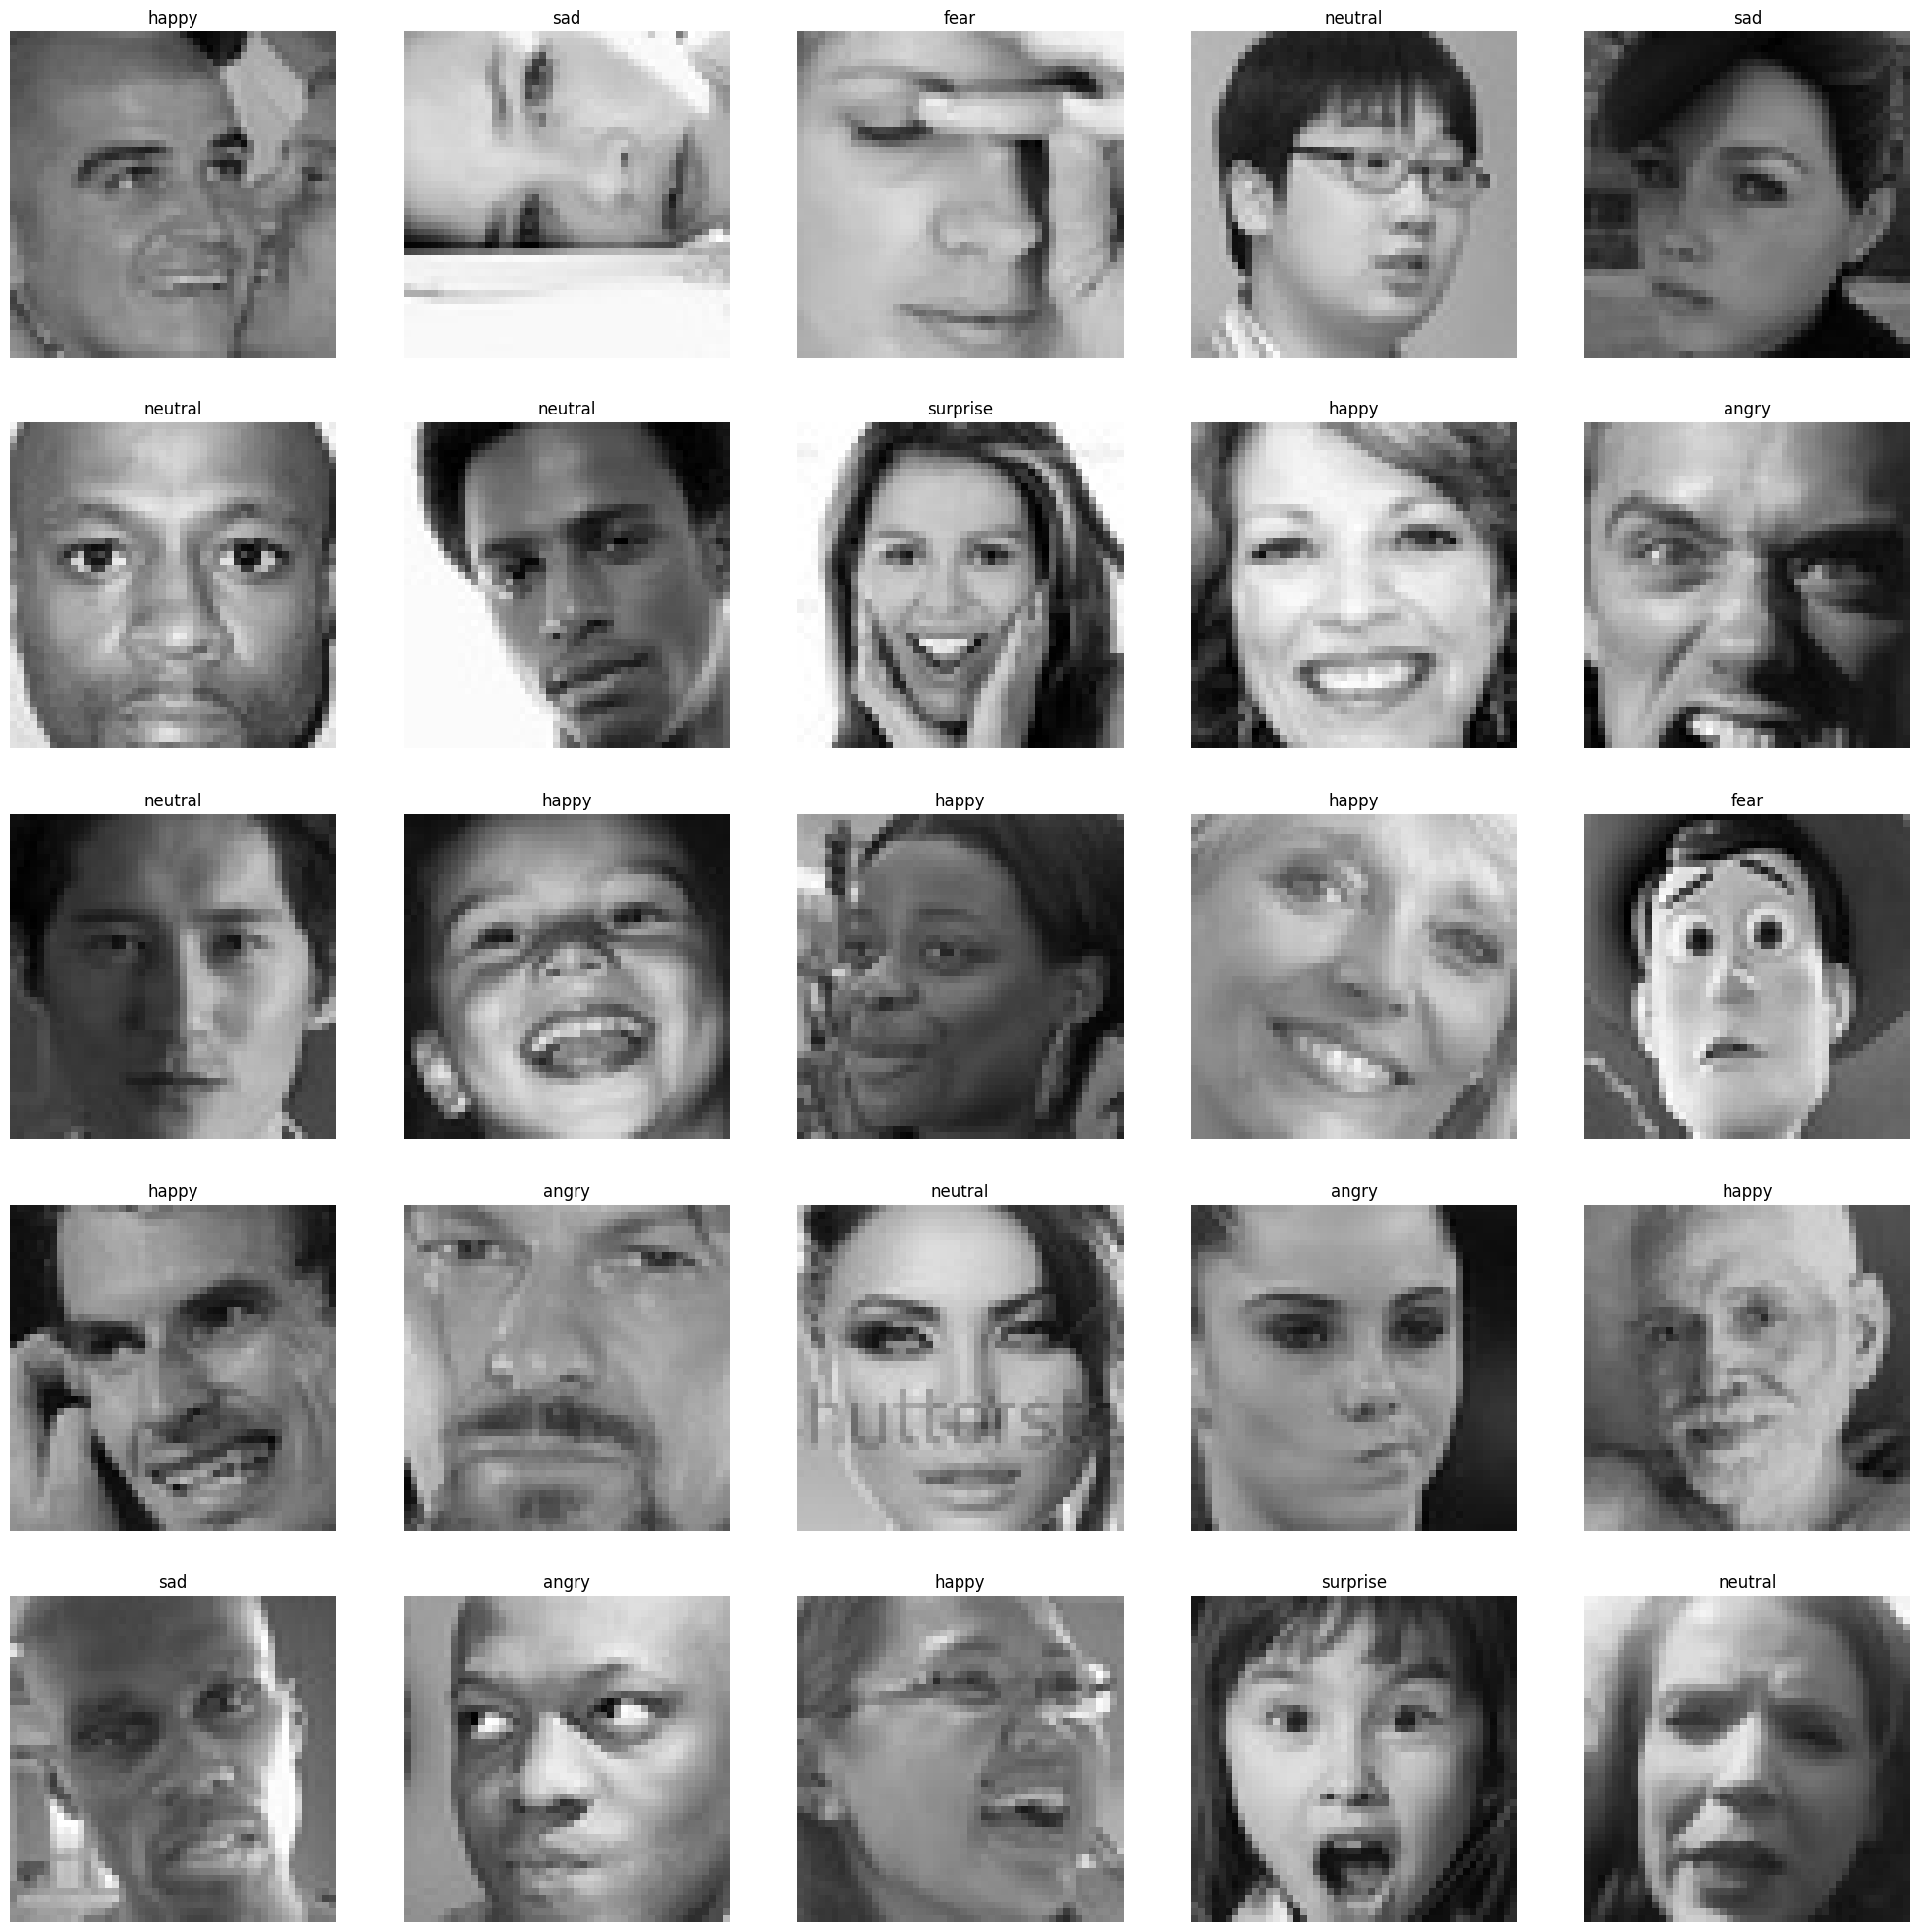

In [17]:
# to display grid of images
plt.figure(figsize=(25,25))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [18]:
from tqdm import tqdm
from keras.preprocessing.image import load_img

def extract_features(imges):
  features =[]
  for image in tqdm(imges):
    img = load_img(image, color_mode="grayscale")
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 48, 48, 1)
  return features

In [19]:
train['image'], train['label'] = load_dataset(Train_path)
train_features = extract_features(train['image'])

neutral Completed
angry Completed
surprise Completed
happy Completed
disgust Completed
sad Completed
fear Completed


100%|██████████| 28821/28821 [00:03<00:00, 7367.90it/s]


In [20]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)


        if not os.path.isdir(label_path):
            continue

        for filename in os.listdir(label_path):
            file_path = os.path.join(label_path, filename)


            if (
                os.path.isfile(file_path)
                and filename.lower().endswith(('.png', '.jpg', '.jpeg'))
            ):
                image_paths.append(file_path)
                labels.append(label)

        print(label, "Completed")

    return image_paths, labels


In [21]:
test_images, test_labels = load_dataset(Test_path)
test = pd.DataFrame({'image': test_images, 'label': test_labels})

test_features = extract_features(test['image'])

neutral Completed
angry Completed
test Completed
surprise Completed
happy Completed
disgust Completed
sad Completed
fear Completed


100%|██████████| 7178/7178 [00:00<00:00, 8320.57it/s]


In [22]:
#normalize the image

x_train=train_features/255.0
x_test=test_features/255.0

In [23]:
#convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [24]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [25]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.])

In [26]:
# config

input_shape = (48, 48, 1)
output_class = 7


In [27]:
from tensorflow.keras.models import Sequential

model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#fully connected layers

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

#output layer

model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# train the model

history = model.fit(x=x_train,y= y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.2292 - loss: 1.8404 - val_accuracy: 0.2471 - val_loss: 1.8178
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.2495 - loss: 1.8117 - val_accuracy: 0.2597 - val_loss: 1.7885
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.2778 - loss: 1.7486 - val_accuracy: 0.3755 - val_loss: 1.6039
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.3475 - loss: 1.6295 - val_accuracy: 0.4245 - val_loss: 1.4831
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.4025 - loss: 1.5290 - val_accuracy: 0.4684 - val_loss: 1.3760
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4380 - loss: 1.4552 - val_accuracy: 0.5001 - val_loss: 1.2904
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.4555 - loss: 1.4117 - val_accuracy: 0.5220 - val_loss: 1.2596
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.4735 - loss: 1

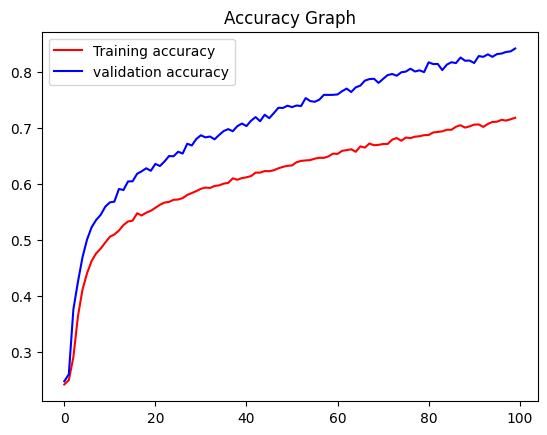

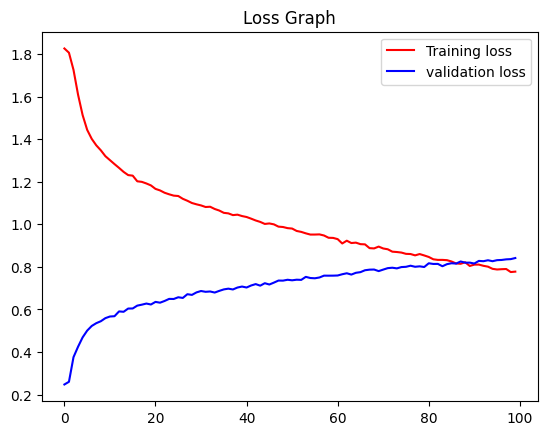

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [31]:
acc = history.history['accuracy']
Val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, Val_acc, 'b', label='validation accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

#plt.figure()

loss = history.history['loss']
Val_loss= history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, Val_acc, 'b', label='validation loss')
plt.title('Loss Graph')
plt.legend()
plt.show()
plt.figure()

Test with Image Data

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Output: neutral


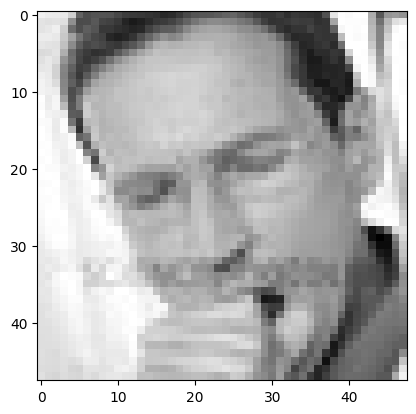

In [36]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [37]:
score = model.evaluate(x_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.5175013542175293
Test accuracy:  0.8411813974380493
